In [34]:
import json
import os
from os.path import join
import matplotlib.pyplot as plt
import csv

output_folder = "../../output"
input_folder = "../../input"

In [12]:
with open(join(output_folder, "engine_ids.json"), "r") as f:
    data = json.load(f)

print(os.listdir(join(output_folder, "cves_per_engId")))

analysedEngIds = [name for name in os.listdir(join(output_folder, "cves_per_engId"))]
analysedEngIds

['00000009020000027d89dd80', '0000000902000002b96e99e0', '0000000902000003e3912986', '000000090200000a8b09c7ce', '00000009020000107ba82d10', '0000000902000011bcf0d800', '0000000902000030a3123000', '0000000902000050735d7d81', '00000009020000b04a599000', '00000009020000d0ba938540', '000000090300001e13928dc0', '0000000903000027e3a2a9f8', '0000000903000027e3a2ba78', '000000090300002f5cfc172a', '000000090300002f5cfdcd6c', '00000009030000562bab7f82', '00000009030000562bab7fb8', '00000009030000562bab8000', '00000009030000562bab8012', '00000009030000562bab80b4', '00000009030000562bab9ff8', '000000090300007686022590', '00000009030000778d561944', '000000090300009e1e5ca8a2', '00000009030000a2ee3f7578', '00000009030000a2ee3f7704', '00000009030000a38e97b52a', '00000009030000a3d12250e8', '00000009030000a3d1225b0e', '00000009030000a7420b4420', '00000009030000a7420f4500', '00000009030000a7421fd1b0', '00000009030000a74221a710', '00000009030000a74242f5b0', '00000009030000a7424d7d20', '00000009030000a742

['00000009020000027d89dd80',
 '0000000902000002b96e99e0',
 '0000000902000003e3912986',
 '000000090200000a8b09c7ce',
 '00000009020000107ba82d10',
 '0000000902000011bcf0d800',
 '0000000902000030a3123000',
 '0000000902000050735d7d81',
 '00000009020000b04a599000',
 '00000009020000d0ba938540',
 '000000090300001e13928dc0',
 '0000000903000027e3a2a9f8',
 '0000000903000027e3a2ba78',
 '000000090300002f5cfc172a',
 '000000090300002f5cfdcd6c',
 '00000009030000562bab7f82',
 '00000009030000562bab7fb8',
 '00000009030000562bab8000',
 '00000009030000562bab8012',
 '00000009030000562bab80b4',
 '00000009030000562bab9ff8',
 '000000090300007686022590',
 '00000009030000778d561944',
 '000000090300009e1e5ca8a2',
 '00000009030000a2ee3f7578',
 '00000009030000a2ee3f7704',
 '00000009030000a38e97b52a',
 '00000009030000a3d12250e8',
 '00000009030000a3d1225b0e',
 '00000009030000a7420b4420',
 '00000009030000a7420f4500',
 '00000009030000a7421fd1b0',
 '00000009030000a74221a710',
 '00000009030000a74242f5b0',
 '000000090300

In [13]:
counter = 0

for k, i in data.items():
    if k not in analysedEngIds:
        print(k)
        print(i)
        counter += 1

print(counter)

8000517a0300171011608000
{'vendor': {'id': 20858, 'name': 'Casa Systems, Inc.', 'contact': 'mib support', 'email': 'mibsupport&casa-systems.com'}, 'mac_address': '17:10:11:60:80:00', 'mac_blocks': []}
000000000000217011217046
{'vendor': {'id': 0, 'name': 'Reserved', 'contact': 'Internet Assigned Numbers Authority', 'email': 'iana&iana.org'}, 'id': 36765207457862}
800033870370fc8c289a2f
{'vendor': {'id': 13191, 'name': 'OneAccess', 'contact': 'Pascal Kesteloot', 'email': 'pascal.kesteloot&oneaccess-net.com'}, 'mac_address': 'fc:8c:28:9a:2f:00', 'mac_blocks': []}
00009e25c6914132fb4211d7
{'vendor': {'id': 40485, 'name': 'Online.net', 'contact': 'Manfred Touron', 'email': 'mtouron&online.net'}, 'id': 14308289178352357000}
8000517a0300171013e08000
{'vendor': {'id': 20858, 'name': 'Casa Systems, Inc.', 'contact': 'mib support', 'email': 'mibsupport&casa-systems.com'}, 'mac_address': '17:10:13:e0:80:00', 'mac_blocks': []}
00009e253acc3476250effa2
{'vendor': {'id': 40485, 'name': 'Online.net'

In [15]:
checkOrder = ["baseSeverityV31", "baseSeverityV30", "baseSeverityV2"]

metricToNumber = {
    "CRITICAL": 4,
    "HIGH": 3,
    "MEDIUM": 2,
    "LOW": 1,
    "INFORMATIONAL": 0
}

distribution = [0] * 5

for engineId in analysedEngIds:
    with open(join(output_folder, "cves_per_engId", engineId, "cves_important_info.json"), "r") as f:
        data = json.load(f)
    
    max = 0
    for cve in data:
        noMetriv = True
        for metric in checkOrder:
            if(cve[metric] != None):
                noMetriv = False
                if metricToNumber[cve[metric]] > max:
                    max = metricToNumber[cve[metric]]
                break
        
        if noMetriv:
            print("No metric for CVE: " + cve["cveId"] + " in engineId: " + engineId)
    
    distribution[max] += 1

distribution



[465, 0, 77, 283, 520]

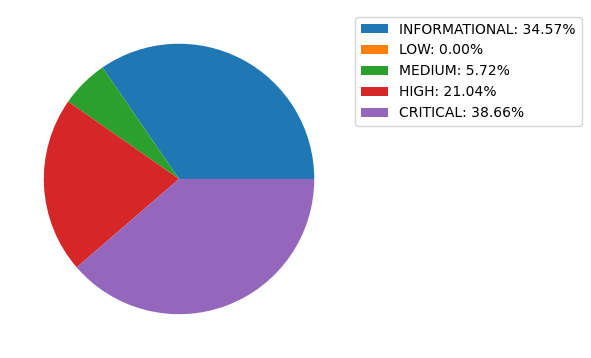

In [33]:
total = sum(distribution)

labels = ["INFORMATIONAL", "LOW", "MEDIUM", "HIGH", "CRITICAL"]
percentages = [(value / total) * 100 for value in distribution]
legend_labels = [f"{label}: {percentage:.2f}%" for label, percentage in zip(labels, percentages)]

plt.figure(figsize=(6, 6))
# Plotting the pie chart
plt.pie(distribution)

# Adding a legend with labels including percentages
plt.legend(labels=legend_labels, loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

In [ ]:
engToCountry = {}
with open(join(output_folder, "testing_snmp_results_extended.csv"), "r") as f:
    reader = csv.reader(f)
    next(reader)
    for i, row in enumerate(reader):
        reset_date = row[3]
        # final_date = datetime(row[5])
        engineId = row[4]

        country = row[6]

        if engineId == "Error":
            continue

        writer.writerow([engineId, reset_date])
        engToCountry[engineId] = reset_date

with open(join(output_folder, "engine_to_reset_date.json"), "w") as f:
    json.dump(engToResetDate, f)